<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/Regressao_Poli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressao_Poli


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/douglasbarbosadelima/Data-Science/master/cars-uci-linked.csv')
df=df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst
4,17.0,8,3020,140.0,3449,105,70,1,ford torino


Vamos fazer a regressão só com a feature potência e peso (horsepower e weigth) e essas features ao quadrado

Inicialmente, vamos standardizar horsepower (conserve media e desvio padrão, serão necessários no final)

In [0]:
def standard(f):
  me = f.mean()
  dp=f.std()
  return me, dp, (f - me) / dp

med, dp, df['hps'] = standard(df['horsepower'])
mew, dpw, df['wts'] = standard(df['weight'])

In [9]:
df['hpsq'] = df['hps'] ** 2
df['htsq'] = df['wts'] ** 2

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hps,wts,hpsq,htsq
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu,0.663285,0.619748,0.439947,0.384088
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320,1.572585,0.842258,2.473023,0.709398
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite,1.182885,0.539692,1.399217,0.291268
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst,1.182885,0.536160,1.399217,0.287468
4,17.0,8,3020,140.0,3449,105,70,1,ford torino,0.923085,0.554997,0.852086,0.308022


Vamos agora montar a matriz X e o vetor y(target)

In [12]:
X = np.ones((len(df), 5)) # entradas
X[:,1] = df['hpsq']
X[:,2] = df['htsq']
y = df['mpg'].copy()
X, y

(array([[1.        , 0.4399471 , 0.38408799, 1.        , 1.        ],
        [1.        , 2.47302289, 0.70939797, 1.        , 1.        ],
        [1.        , 1.39921671, 0.29126752, 1.        , 1.        ],
        ...,
        [1.        , 0.28280541, 0.64578107, 1.        , 1.        ],
        [1.        , 0.43783957, 0.17230525, 1.        , 1.        ],
        [1.        , 0.34076931, 0.0919626 , 1.        , 1.        ]]),
 0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 401    27.0
 402    44.0
 403    32.0
 404    28.0
 405    31.0
 Name: mpg, Length: 392, dtype: float64)

Para usarmos Gradient Descent, vamos obter a função gradiente do erro médio quadrático gradEMQ(X,theta,y)

In [0]:
def gradEMQ(x, theta, y):
  return (1 / len(y)) * np.dot(X.T, np.dot(X, theta) - y)

Vamos criar a função erro médio quadrático também emq(ye,y)

In [0]:
def emq(ye, y):
  dif = ye - y
  return (1 / len(y)) * np.inner(dif, dif)

Agora, aplicaremos Gradient Descent (criar lista de custos), com theta0 e theta1 começando com 1 e 0.5

In [19]:
lc = []
lr = 0.01
theta = np.array([0.5, 0.5, 0.5, 0.5, 0.5])
lc.append(emq(np.dot(X, theta), y))
for i in range(2000):
  g = gradEMQ(X, theta, y)
  theta -= (lr * g)
  lc.append(emq(np.dot(X, theta), y))
theta
lc[-1]
                                      

54.67181830163401

Vamos fazer o gráfico do custo ao longo das iterações do Grad. Desc.

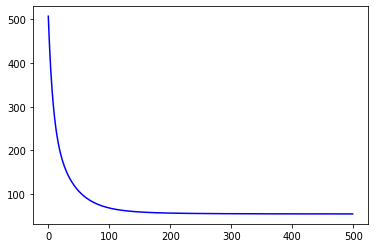

In [20]:
plt.plot(lc[:500], color='blue')
plt.show()

Finalmente, vamos fazer a função predict(pot,theta,md,dp) que retorna a predição do consumo para a potência

In [0]:
def predict(pot, peso):
  pots = (pot - med) / dp
  pesos = (peso - mew) / dpw
  return theta[0] + theta[1] * pots + theta[2] * pesos


Faça a predição para potência de 180HP peso 3000



In [0]:
predict(180, 3000)

19.516435157211493

mostre a média de consumo para potência=160 no dataset

In [0]:
df[df['horsepower'] == 160]['mpg'].mean()

13.0